# Analyzing Concrete Strength Using Regression Models

## Introduction

In the field of civil engineering, understanding the compressive strength of concrete is crucial for ensuring the structural integrity and safety of buildings and infrastructure. Concrete strength is influenced by various factors such as the mixture's composition, curing conditions, and environmental influences. Accurately predicting the strength of concrete based on these variables can help engineers and construction professionals make informed decisions, optimize material usage, and reduce costs.

This project aims to analyze concrete strength using a dataset containing various features related to the mix composition and curing conditions of concrete samples. Our goal is to build predictive models that can estimate the compressive strength of concrete based on these input features.

To achieve this, we will explore and compare three different regression techniques:

    Linear Regression: A fundamental statistical method that assumes a linear relationship between the input variables and the target variable. It will serve as a baseline model to understand how well a simple linear approach can predict concrete strength.

    Random Forest Regression: An ensemble learning method that builds multiple decision trees and merges them to improve the accuracy and stability of the prediction. This model is particularly useful for capturing non-linear relationships and interactions between variables.

    XGBoost Regression: An advanced gradient boosting algorithm that has shown superior performance in many machine learning competitions. XGBoost is designed to be highly efficient, flexible, and portable, making it a suitable choice for handling complex datasets with numerous features and interactions.

By comparing the performance of these models, we will determine the most effective approach for predicting concrete strength, providing valuable insights into the factors that most significantly impact it. The results of this analysis could be used to guide the optimization of concrete mix designs in real-world applications.

## Source data

Yeh,I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

## Variable information

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable 

## Data and library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error  
from scipy import stats
import shap

sns.set_style('darkgrid')

In [2]:
raw_data = pd.read_csv('Concrete_Data.csv')

In [3]:
raw_data.sample(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
650,122.6,183.9,0.0,203.5,0.0,958.2,800.1,90,33.19
775,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,22.44
642,250.0,0.0,0.0,182.0,0.0,1100.0,820.0,28,20.87
707,200.0,133.0,0.0,192.0,0.0,965.4,806.2,90,43.25
384,516.0,0.0,0.0,162.0,8.2,801.0,802.0,28,41.37


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
raw_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
raw_data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

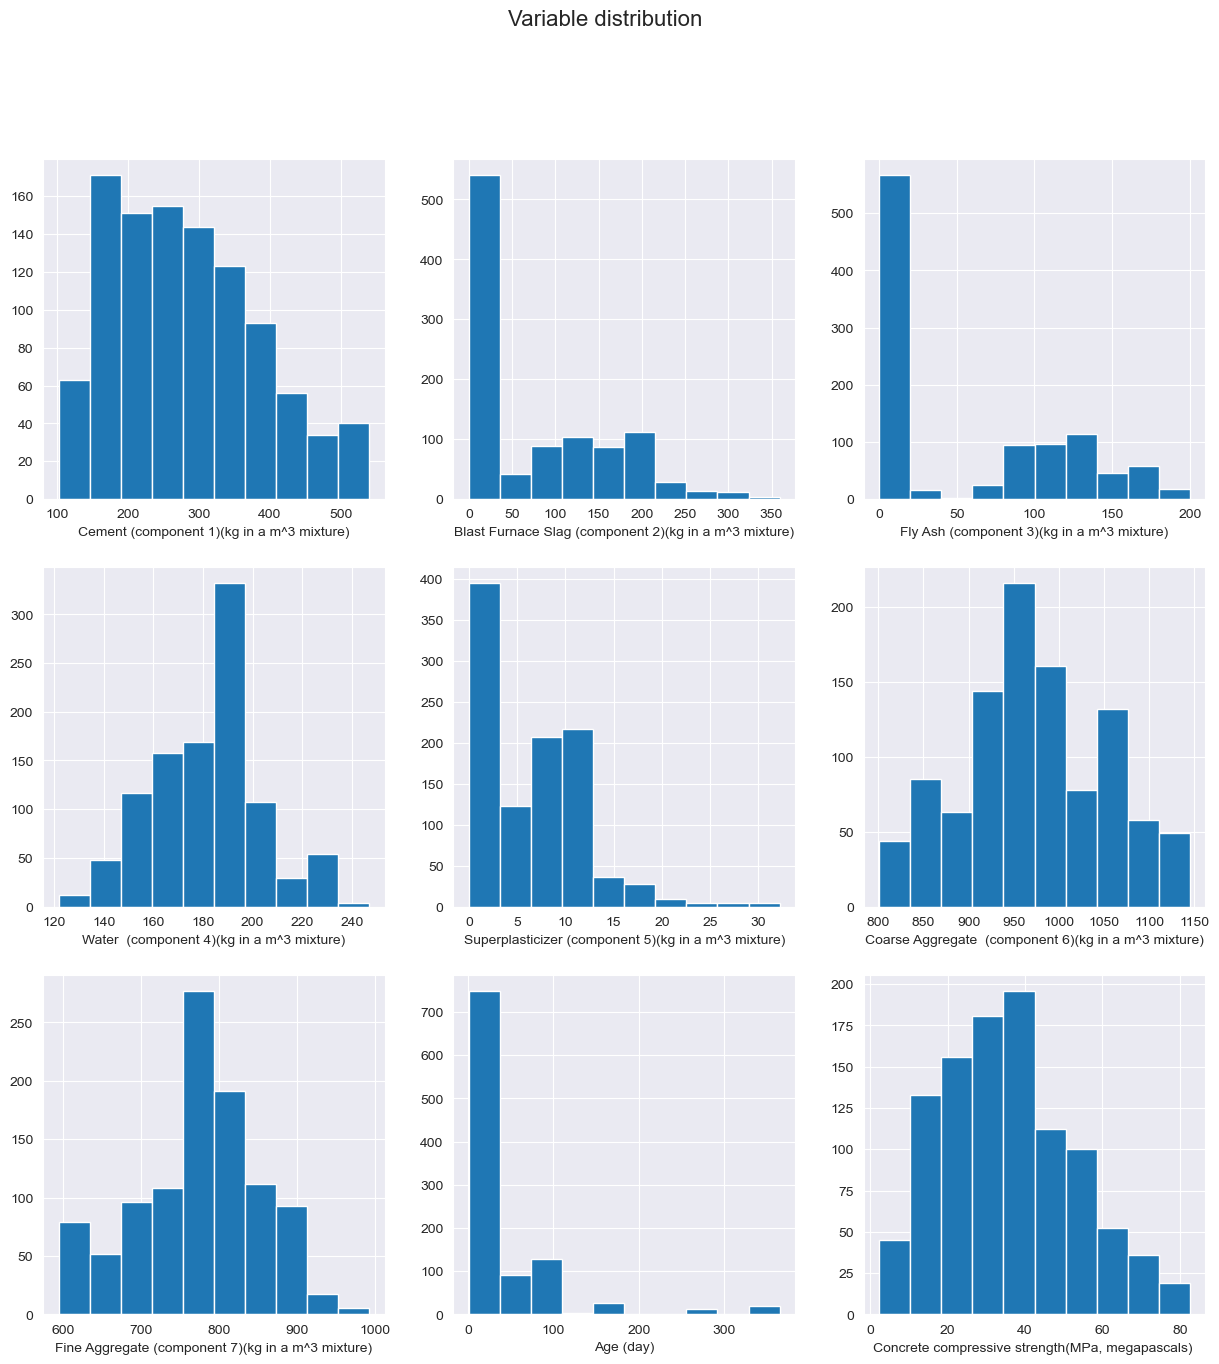

In [7]:
i = 0
j = 0
n = 3
m = 3

fig, ax = plt.subplots(n,m,figsize = (15,15))


for idx, col in enumerate(raw_data.columns):
    if idx % m == 0 and idx > 0:
        i += 1
        j = 0
    ax[i][j].hist(raw_data[col])
    ax[i][j].set_xlabel(col)
    j += 1
    
    
fig.suptitle('Variable distribution', fontsize=16)
plt.show()

<Axes: >

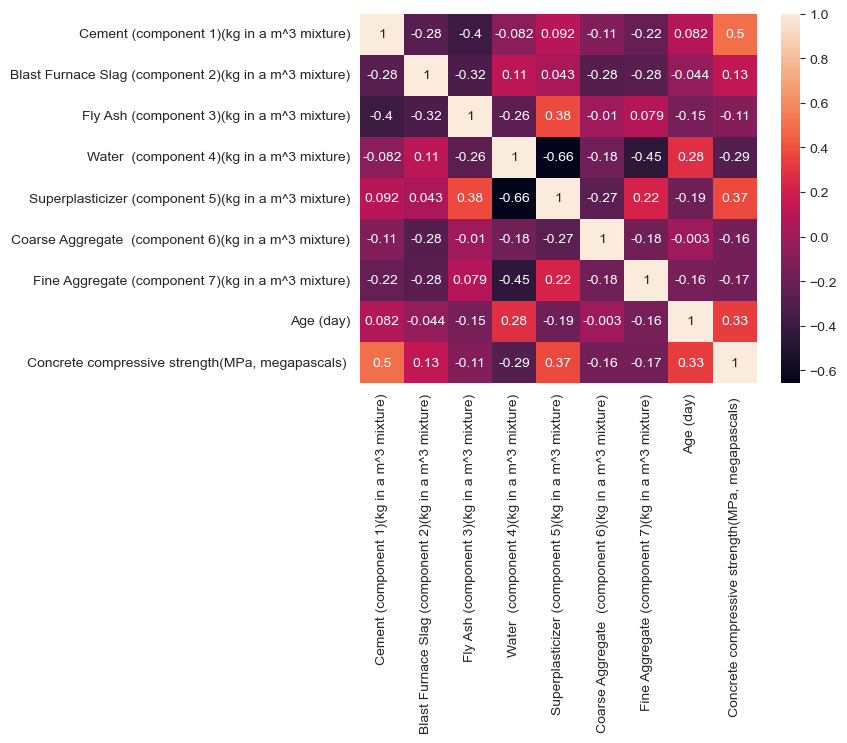

In [8]:
sns.heatmap(raw_data.corr(),annot=True)

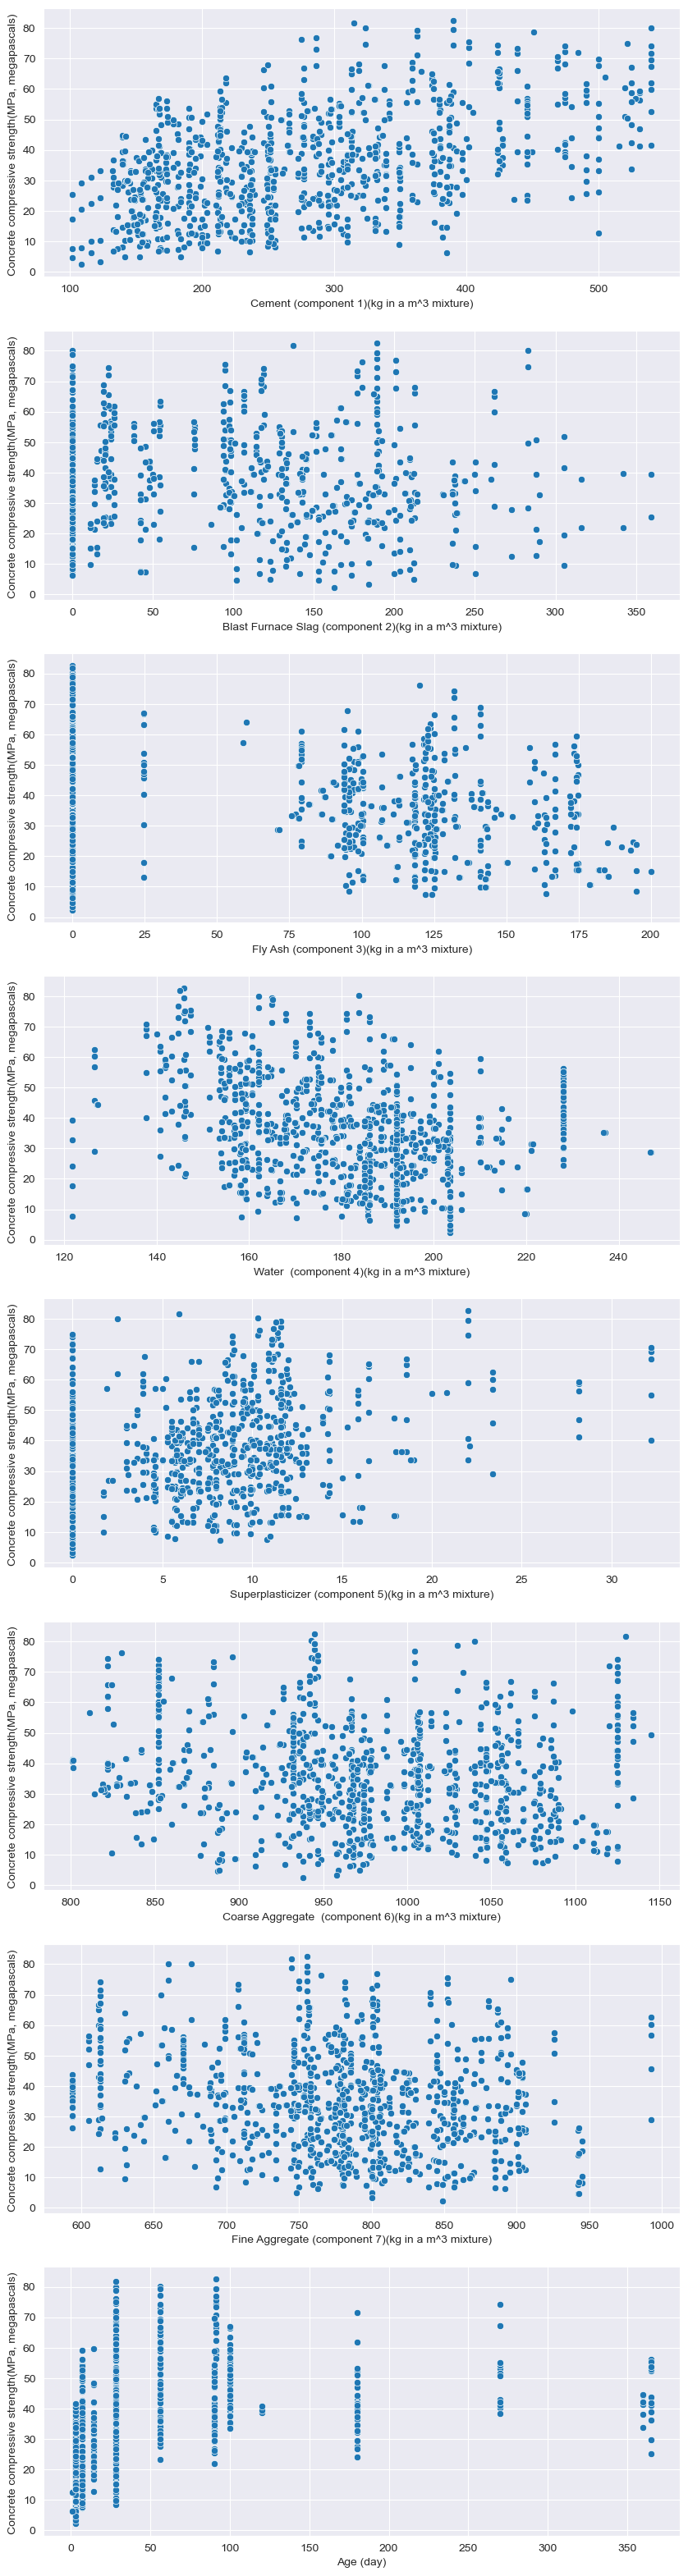

In [9]:
feature_list = list(raw_data.columns)
feature_list.remove('Concrete compressive strength(MPa, megapascals) ')
target = 'Concrete compressive strength(MPa, megapascals) '

fig, ax = plt.subplots(len(feature_list),1,figsize=(10,40))

for i, feature in enumerate(feature_list):
    sns.scatterplot(data=raw_data,x=feature,y=target,ax=ax[i])


In [10]:
## column renaming for easier referencing
new_cols = {}
for i in range(7):
    new_cols[raw_data.columns[i]] = 'component_' + str(i+1)
    
new_cols['Age (day)'] = 'age'
new_cols['Concrete compressive strength(MPa, megapascals) '] = 'strength'

In [11]:
df = raw_data.rename(columns=new_cols)

In [12]:
df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Variable and Input processing

In [13]:
X = df.drop('strength',axis=1)
y = df['strength']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
scaler = StandardScaler()

scaler.fit(X_train,y_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
pca = PCA()
pca.fit(X_train_scaled)

X_train_PCA = pca.transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

## Model Testing and Evaluation



In [17]:
lin_reg = LinearRegression()
pca_reg = LinearRegression()
rand_forest = RandomForestRegressor()
xgb_reg = xgb.XGBRegressor()

In [18]:
def fit_predict(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

def model_metrics(y_test, y_pred,model_name):
    mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
    #squared True returns MSE value, False returns RMSE value. 
    mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True 
    rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
    
    
    metrics_dict = {"mae" : mae,
                    "mse" : mse,
                    "rmse" : rmse}
    
    metrics_df = pd.DataFrame(metrics_dict,index=[0])
    metrics_df['model'] = model_name
    
    return metrics_df

### Linear Regression

In [19]:
y_pred_lin_reg = fit_predict(lin_reg,X_train_scaled,y_train,X_test_scaled)

In [20]:
lin_reg_metrics = model_metrics(y_test,y_pred_lin_reg,'linear_regression')

print("Linear Regression Metrics:\n")
print(lin_reg_metrics)

Linear Regression Metrics:

        mae         mse       rmse              model
0  8.302168  113.484728  10.652921  linear_regression


In [21]:
lin_reg.coef_

array([12.6779729 ,  9.79805822,  5.97141629, -2.34078879,  2.2003866 ,
        2.21308906,  2.31976063,  7.15525809])

In [22]:
lin_reg.score(X_test_scaled,y_test)

0.6019279238746869

### Linear Regression after PCA

In [23]:
y_pred_PCA = fit_predict(pca_reg, X_train_PCA,y_train,X_test_PCA)

In [24]:
pca_reg_metrics = model_metrics(y_test,y_pred_PCA,'linear_regression_PCA')

print("Linear Regression with PCA Metrics:\n")
print(pca_reg_metrics)

Linear Regression with PCA Metrics:

        mae         mse       rmse                  model
0  8.302168  113.484728  10.652921  linear_regression_PCA


In [25]:
pca_reg.score(X_test_PCA,y_test)

0.6019279238746869

### Random Forest

In [26]:
y_pred_rand_forest = fit_predict(rand_forest,X_train_scaled,y_train,X_test_scaled)

In [27]:
rand_forest_metrics = model_metrics(y_test,y_pred_rand_forest,'random_forest')

print("Random Forest Metrics:\n")
print(rand_forest_metrics)

Random Forest Metrics:

        mae        mse      rmse          model
0  3.936642  29.761857  5.455443  random_forest


In [28]:
rand_forest.score(X_test_scaled,y_test)

0.895603889879435

### XGBoost

In [29]:
y_pred_xgb = fit_predict(xgb_reg,X_train_scaled,y_train,X_test_scaled)

In [30]:
xgb_reg_metrics = model_metrics(y_test,y_pred_xgb,'xgboost')

print("XG Boost Metrics:\n")
print(xgb_reg_metrics)

XG Boost Metrics:

        mae        mse      rmse    model
0  3.340079  24.865336  4.986515  xgboost


In [31]:
xgb_reg.score(X_test_scaled,y_test)

0.9127794892545167

## Hyperparameter adjusting 

### XG Boost

In [32]:
xgb_tuned = xgb.XGBRegressor()

In [33]:
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

In [34]:
grid_search_xgb = GridSearchCV(xgb_tuned,param_grid=hyperparameter_grid)

In [35]:
y_pred_grid = fit_predict(grid_search_xgb,X_train_scaled,y_train,X_test_scaled)

In [36]:
grid_search_metrics = model_metrics(y_test,y_pred_grid,'random_forest_random_cv')
grid_search_metrics

,mae,mse,rmse,model
0,3.212625,22.337281,4.726233,random_forest_random_cv


In [37]:
grid_search_xgb.score(X_test_scaled,y_test)

0.92164718763285

In [38]:
grid_search_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
hyperparameters = {
    'n_estimators': 800,
    'max_depth': 3,
    'learning_rate': 0.20,
    'min_child_weight': 10
    }


xgb_hyperparameter = xgb.XGBRegressor(n_estimators = 800,
                                      max_depth = 3,
                                     learning_rate = 0.2,
                                     min_child_weight = 10)

y_pred_xgb_tuned = fit_predict(xgb_hyperparameter, X_train_scaled, y_train, X_test_scaled)

xgb_hyperparameter_metrics = model_metrics(y_test,y_pred_xgb_tuned,'XGB_hyperparameters')
xgb_hyperparameter_metrics

,mae,mse,rmse,model
0,3.135379,21.877506,4.67734,XGB_hyperparameters


In [40]:
xgb_hyperparameter.score(X_test_scaled,y_test)

0.9232599454845437

## Feature importance and Analysis

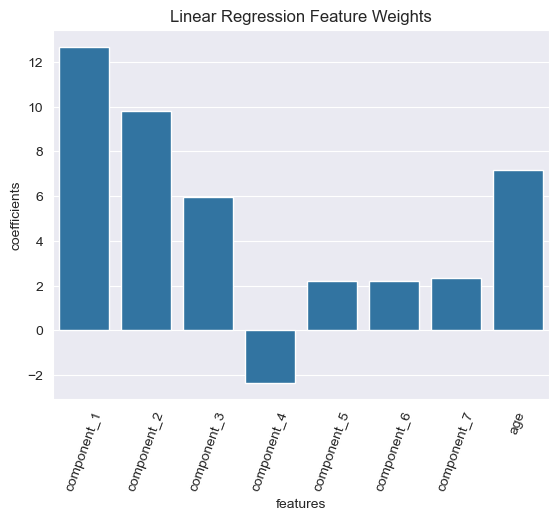

In [41]:
fig, ax = plt.subplots()

sns.barplot(x=X.columns,y=lin_reg.coef_)
ax.set_xlabel('features')
ax.set_ylabel('coefficients')
ax.set_title('Linear Regression Feature Weights')

plt.xticks(rotation=70)
plt.show()

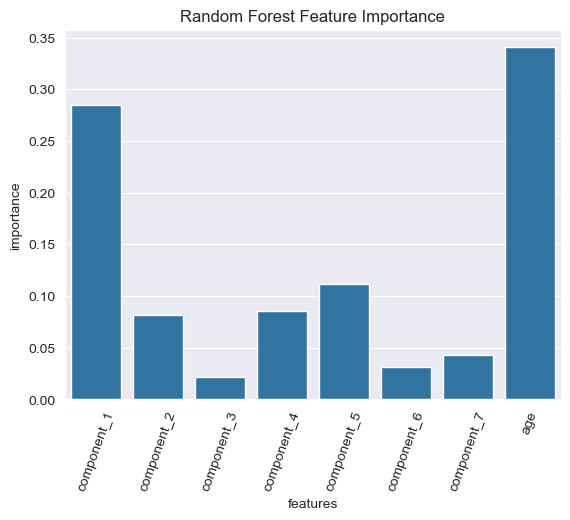

In [42]:
fig, ax = plt.subplots()

sns.barplot(x= X.columns, y = rand_forest.feature_importances_)
ax.set_xlabel('features')
ax.set_ylabel('importance')
ax.set_title('Random Forest Feature Importance')

plt.xticks(rotation=70)
plt.show()

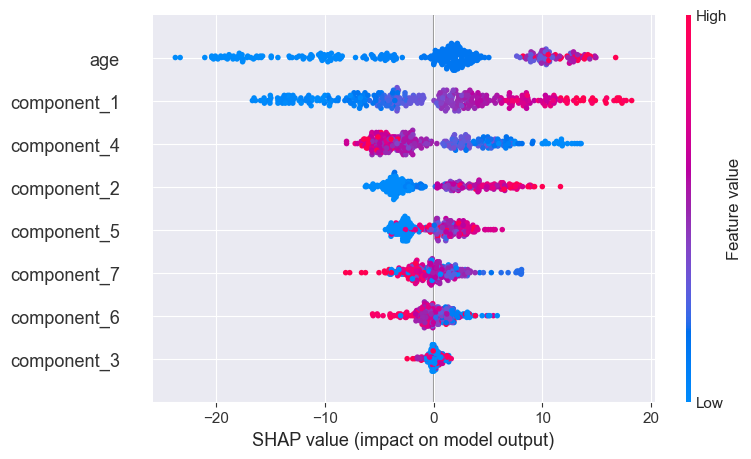

In [43]:
explainer = shap.Explainer(xgb_hyperparameter)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled,feature_names=X.columns)


## Model Comparisons

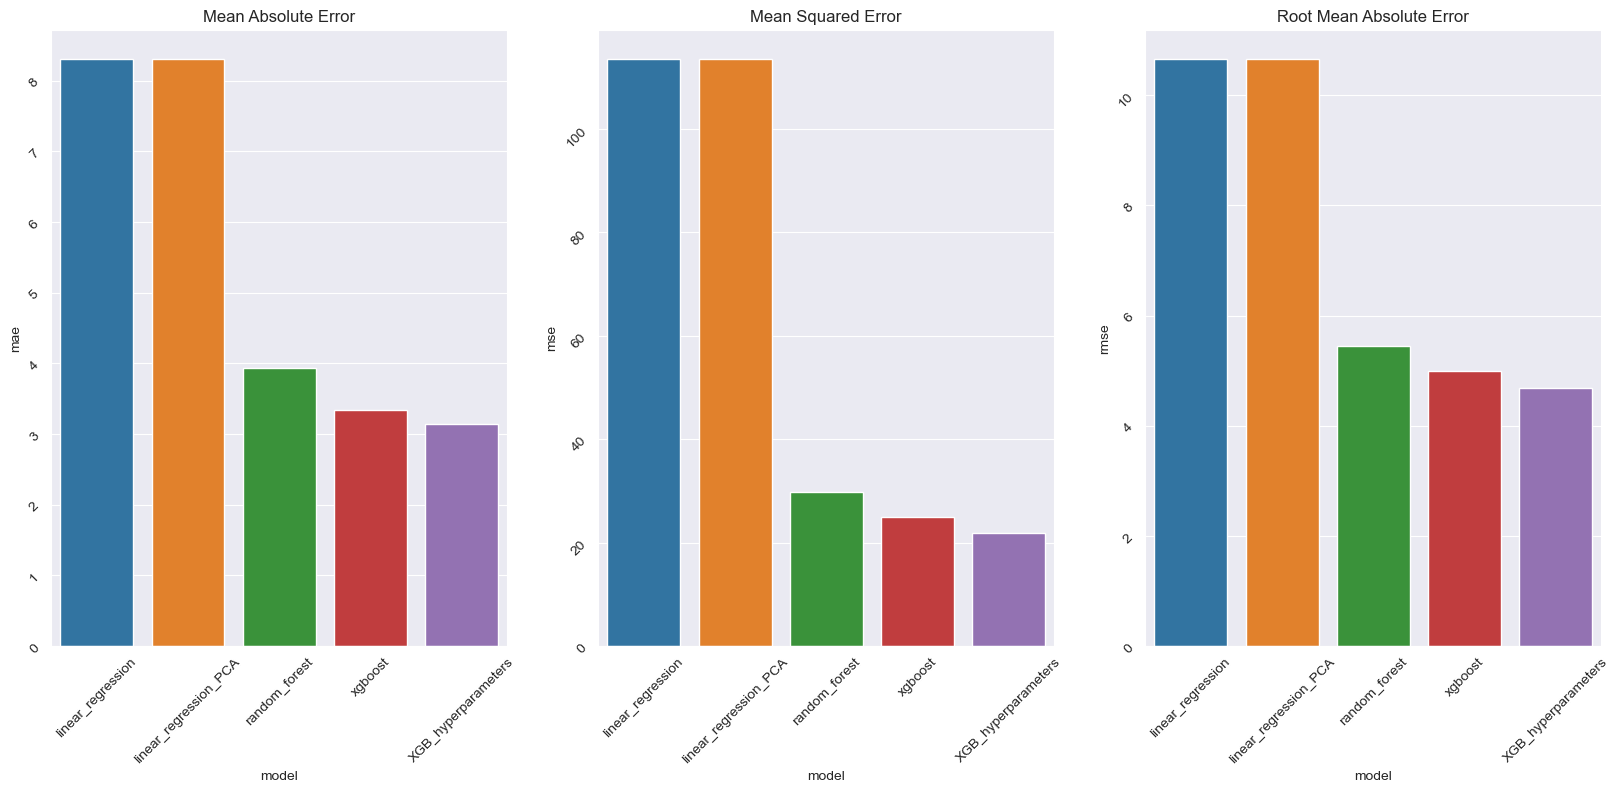

In [44]:
model_metrics = pd.concat([lin_reg_metrics,pca_reg_metrics,rand_forest_metrics,xgb_reg_metrics,xgb_hyperparameter_metrics])

fig, ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(data=model_metrics,x='model',y='mae',ax=ax[0],hue='model',legend=False)
sns.barplot(data=model_metrics,x='model',y='mse',ax=ax[1],hue='model',legend=False)
sns.barplot(data=model_metrics,x='model',y='rmse',ax=ax[2],hue='model',legend=False)

ax[0].tick_params(labelrotation=45)
ax[0].set_title("Mean Absolute Error")

ax[1].tick_params(labelrotation=45)
ax[1].set_title("Mean Squared Error")

ax[2].tick_params(labelrotation=45)
ax[2].set_title("Root Mean Absolute Error")

plt.show()

## Final Thoughts

After comparing 3 different models, it is clear that XG Boost is the best performing model out of the 3 models evaluated. 4 parameters were used to evaluate the models' performances: MAE, MSE, RSME and score. In all 4 departments XG Boost outperformed the other models with a final score of 0.9232.

Following this, the XGB model was further fine tuned using the GridSearch from sk-learn to achieve a better model performance. Although the boost was not as significant it still was an improvement from the base model. Age, water, and blast furnace slag having the most importance according to the SHAP plot.

## References

Aarshay (2024) XGBOOST parameters tuning: A complete guide with python codes, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ (Accessed: 30 August 2024). 

Banerjee, P. (no date) A guide on XGBoost hyperparameters tuning, Kaggle. Available at: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning (Accessed: 30 August 2024). 

Beheshti, N. (2022) Random Forest regression, Medium. Available at: https://towardsdatascience.com/random-forest-regression-5f605132d19d (Accessed: 30 August 2024). 

Cambridge Spark (2019) Hyperparameter tuning in xgboost, Medium. Available at: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f (Accessed: 30 August 2024). 

Dutta, A. (2023) Random Forest regression in python, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/random-forest-regression-in-python/ (Accessed: 30 August 2024). 

IBM (2021) What is linear regression?, IBM. Available at: https://www.ibm.com/topics/linear-regression (Accessed: 30 August 2024). 

Learn, S. kit (no date) Randomforestregressor, scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html (Accessed: 30 August 2024). 

Rithp (2023) Optimizing xgboost: A guide to hyperparameter tuning, Medium. Available at: https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d (Accessed: 30 August 2024). 

XGB (no date) XGBoost documentation, XGBoost Documentation - xgboost 2.1.1 documentation. Available at: https://xgboost.readthedocs.io/en/stable/ (Accessed: 30 August 2024). 

Awan, A.A. (2023) An introduction to shap values and machine learning interpretability, DataCamp. Available at: https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability (Accessed: 30 August 2024). 